# Instacart Grocery Basket Analysis
## A4e10 Excel Reporting

## Contents
- [Setup workspace](#sec1)
- [Load data (Part 1, Step 1)](#sec2)
- [Review data for PII (Part 1, Step 2)](#sec3)
- [Create region column (Part 1 Step 3a)](#sec4)
- [Look for regional spending patterns (Part 1, Step 3b)](#sec5)
- [Create flag for low-activity customers (Part 1, Step 4a)](#sec6)
- [Create a subset dataframe for regular activity level customers (Part 1, Step 4b)](#sec7)
- [Create cust_profile variable (Part 1, Step 5)](#sec8)
- [Create visualization to show profile distribution (Part 1, Step 6)](#sec9)
- [Aggregate the max, mean, min vars (Part 1, Step 7)](#sec10)
- [ Aggregate Prices by Profile](#sec10.1)
- [Aggregate Prices by Profile and Family Status](#sec10.2)
- [Aggregate Prices by Profile and Region](#sec10.3)
- [Aggregate Prices by Profile and Department](#sec10.4)
- [More column mods to enhance any additional visualizations that may be created](#sec11)
- [Export final data set (Part 1, Step 10)](#sec12)

<a id="sec1"></a>
## 1.  Setup workspace

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path var
path = r'C:\Users\mbkie\Documents\CF data analytics\Immersion\Instacart'

<a id="sec2"></a>
## 2.  Load data (Part 1, Step 1)

In [3]:
# load merged data with customer columns;  df_opc is dataframe orders, products, customers
df_opc = pd.read_pickle(os.path.join(path, 'data', 'prepped', 'orders_products_cust_merged_ex9.pkl'))

<a id="sec3"></a>
## 3. Review data for PII (Part 1, Step 2)

In [4]:
# dataframe has many columns so use set_option to output all columns
pd.set_option('display.max_columns', None)

In [5]:
# display first rows and review for PII
df_opc.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_flag,avg_days_btw_orders,order_frq_flag,first_name,last_name,gender,state,age,date_joined,num_dependents,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Moderately busy,Average orders,10,New customer,6.367797,Low spender,18.542373,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Moderately busy,Average orders,10,New customer,6.367797,Low spender,18.542373,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Moderately busy,Average orders,10,New customer,6.367797,Low spender,18.542373,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Moderately busy,Average orders,10,New customer,6.367797,Low spender,18.542373,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Moderately busy,Average orders,10,New customer,6.367797,Low spender,18.542373,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### In this dataset the PII includes first_name, last_name, state, age, num_dependents, and fam_status 

<a id="sec4"></a>
## 4. Create region column (Part 1 Step 3a)

In [6]:
df_opc.loc[df_opc['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',\
                               'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'
df_opc.loc[df_opc['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',\
                               'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'
df_opc.loc[df_opc['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',\
                               'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee',\
                               'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'
df_opc.loc[df_opc['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',\
                               'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [7]:
# check region column for null values to reveal misspellings or omissions in the lists of states used to define the regions
# output of "False" indicates success with new region column
df_opc['region'].isnull().any()

False

<a id="sec5"></a>
## 5. Look for regional spending patterns (Part 1, Step 3b)

In [8]:
# create cross table showing spendling levels by region
df_spend = pd.crosstab(df_opc['region'], df_opc['spending_flag'], dropna = False)
df_spend

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [9]:
# add column showing percentage of high spenders
df_spend['percent_hi_spend'] = 100 * df_spend['High spender']/(df_spend['Low spender'] + df_spend['High spender'])

In [10]:
df_spend

spending_flag,High spender,Low spender,percent_hi_spend
region,,,
Midwest,155975,7441350,2.053025
Northeast,108225,5614511,1.891141
South,209691,10582194,1.943043
West,160354,8132559,1.933627


<Figure size 432x288 with 0 Axes>

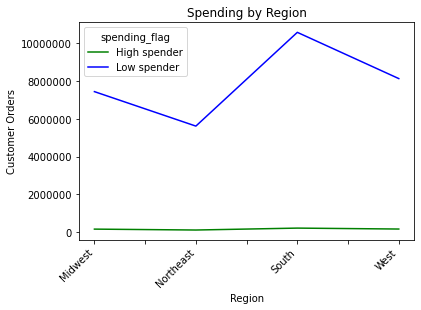

<Figure size 432x288 with 0 Axes>

In [11]:
# plot spending by region in a line chart
chart = df_spend[['High spender', 'Low spender']].plot.line\
  (color = ['green', 'blue'], xlabel= 'Region',  ylabel= 'Customer Orders',
   title = 'Spending by Region')
plt.gca().ticklabel_format(axis='y', style='plain')
plt.xticks(rotation= 45, horizontalalignment="right")
plt.figure()

In [12]:
# save line chart
chart.figure.savefig(os.path.join(path, 'visualizations', 'line_chart_spending_reg.png'))

<Figure size 432x288 with 0 Axes>

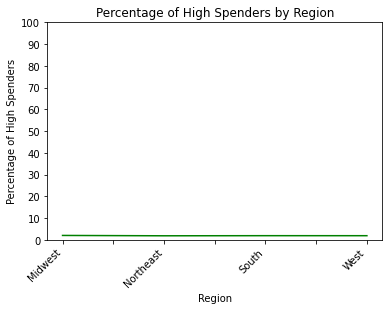

<Figure size 432x288 with 0 Axes>

In [13]:
# plot precentage of high spenders by region in a line chart
chart = df_spend['percent_hi_spend'].plot.line\
  (color = ['green'], xlabel= 'Region',  ylabel= 'Percentage of High Spenders',
   title = 'Percentage of High Spenders by Region')
plt.yticks(np.arange(0, 110, step=10))
#plt.gca().ticklabel_format(axis='y', style='plain')
plt.xticks(rotation= 45, horizontalalignment="right")
plt.figure()

In [14]:
# save line chart
chart.figure.savefig(os.path.join(path, 'visualizations', 'line_chart_percentage_hi_spend_reg.png'))

#### the percentages are quite close, showing little difference in spending proportions by region

<a id="sec6"></a>
## 6. Create flag for low-activity customers (Part 1, Step 4a)

In [15]:
# create a loyalty_flag column based on the max_order column
df_opc.loc[df_opc['max_order'] < 5, 'activity_flag'] = 'low'
df_opc.loc[df_opc['max_order'] >= 5, 'activity_flag'] = 'regular'

In [16]:
# check column contents
df_opc['activity_flag'].value_counts()

regular    30964564
low         1440295
Name: activity_flag, dtype: int64

<a id="sec7"></a>
## 7. Create a subset dataframe for regular activity level customers (Part 1, Step 4b)

In [17]:
# note shape of source dataframe
df_opc.shape

(32404859, 34)

In [18]:
# create dataframe with only regular activity level customers
df_opcreg = df_opc.loc[df_opc['activity_flag'] == 'regular'].copy()

In [19]:
# compare shape of new dataframe to value_counts output from above 
df_opcreg.shape

(30964564, 34)

In [20]:
# delete activity flag column from new dataframe
df_opcreg.drop(columns='activity_flag', inplace=True)

In [21]:
# check shape again to verify one less column
df_opcreg.shape

(30964564, 33)

<a id="sec8"></a>
## 8. Create cust_profile variable (Part 1, Step 5)

In [22]:
# review basic statistics of profile scalars
df_opcreg[['age', 'income', 'num_dependents']].describe()

,age,income,num_dependents
count,3.096456e+07,3.096456e+07,3.096456e+07
mean,4.946803e+01,9.967587e+04,1.501819e+00
std,1.848528e+01,4.314187e+04,1.118896e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.729200e+04,1.000000e+00
50%,4.900000e+01,9.676500e+04,2.000000e+00
75%,6.500000e+01,1.281020e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [23]:
# define profiles with a list
profile_name = ['young adult with infant children, low income',
               'young adult with infant children, mid to high income',
               'young adult with children, low income',
               'young adult with children, mid to high income',
               'young adult with no children, low income',
               'young adult with no children, mid to high income',
               'middle-age with children, low income',
               'middle-age with children, mid to high income',
               'middle-age with no chlidren, low income',
               'middle-age with no children, mid to high income',
               'senior with children, low income',
               'senior with children, mid to high income',
               'senior with no children, low income',
               'senior with no children, mid to high income']

In [24]:
# create a profile column based on age, income, dependents, and certain goods
# young adult with infant children, low income
df_opcreg.loc[((df_opcreg['age'] < 40) &
               (df_opcreg['income'] < 40000) &
               (df_opcreg['num_dependents'] > 0) &
               (df_opcreg['product_name'].str.contains('baby food', case=False) |
                df_opcreg['product_name'].str.contains('diaper', case=False))
               ), 'profile'] = profile_name[0]
# young adult with infant children, mid to high income              
df_opcreg.loc[((df_opcreg['age'] < 40) &
               (df_opcreg['income'] >= 40000) &
               (df_opcreg['num_dependents'] > 0) &
               (df_opcreg['product_name'].str.contains('baby food', case=False) |
                df_opcreg['product_name'].str.contains('diaper', case=False))
               ), 'profile'] = profile_name[1]
# young adult with children, low income
df_opcreg.loc[((df_opcreg['age'] < 40) &
               (df_opcreg['income'] < 40000) &
               (df_opcreg['num_dependents'] > 0) &
               ~(df_opcreg['product_name'].str.contains('baby food', case=False) |
                df_opcreg['product_name'].str.contains('diaper', case=False))
               ), 'profile'] = profile_name[2]
# young adult with infant children, mid to high income              
df_opcreg.loc[((df_opcreg['age'] < 40) &
               (df_opcreg['income'] >= 40000) &
               (df_opcreg['num_dependents'] > 0) &
               ~(df_opcreg['product_name'].str.contains('baby food', case=False) |
                df_opcreg['product_name'].str.contains('diaper', case=False))
               ), 'profile'] = profile_name[3]
# young adult with no children, low income               
df_opcreg.loc[((df_opcreg['age'] < 40) &
               (df_opcreg['income'] < 40000) &
               (df_opcreg['num_dependents'] == 0)
               ), 'profile'] = profile_name[4]
# young adult with no children, mid to high income              
df_opcreg.loc[((df_opcreg['age'] < 40) &
               (df_opcreg['income'] >= 40000) &
               (df_opcreg['num_dependents'] == 0)
               ), 'profile'] = profile_name[5]
# middle-age with children, low income
df_opcreg.loc[((df_opcreg['age'] >= 40) &
               (df_opcreg['age'] < 60) &
               (df_opcreg['income'] < 40000) &
               (df_opcreg['num_dependents'] > 0)
               ), 'profile'] = profile_name[6]
# middle-age with children, mid to high income
df_opcreg.loc[((df_opcreg['age'] >= 40) &
               (df_opcreg['age'] < 60) &
               (df_opcreg['income'] >= 40000) &
               (df_opcreg['num_dependents'] > 0)
               ), 'profile'] = profile_name[7]
# middle-age with no children, low income
df_opcreg.loc[((df_opcreg['age'] >= 40) &
               (df_opcreg['age'] < 60) &
               (df_opcreg['income'] < 40000) &
               (df_opcreg['num_dependents'] == 0)
               ), 'profile'] = profile_name[8]
# middle-age with no children, mid to high income
df_opcreg.loc[((df_opcreg['age'] >= 40) &
               (df_opcreg['age'] < 60) &
               (df_opcreg['income'] >= 40000) &
               (df_opcreg['num_dependents'] == 0)
               ), 'profile'] = profile_name[9]
# senior with children, low income
df_opcreg.loc[((df_opcreg['age'] >= 60) &
               (df_opcreg['income'] < 40000) &
               (df_opcreg['num_dependents'] > 0)
               ), 'profile'] = profile_name[10]
# senior with children, mid to high income
df_opcreg.loc[((df_opcreg['age'] >= 60) &
               (df_opcreg['income'] >= 40000) &
               (df_opcreg['num_dependents'] > 0)
               ), 'profile'] = profile_name[11]
# senior with no children, low income
df_opcreg.loc[((df_opcreg['age'] >= 60) &
               (df_opcreg['income'] < 40000) &
               (df_opcreg['num_dependents'] == 0)
               ), 'profile'] = profile_name[12]
# senior with no children, mid to high income
df_opcreg.loc[((df_opcreg['age'] >= 60) &
               (df_opcreg['income'] >= 40000) &
               (df_opcreg['num_dependents'] == 0)
               ), 'profile'] = profile_name[13]

In [25]:
# inspect results:  no nulls and all 14 categories present
df_opcreg.profile.value_counts(dropna=False)

senior with children, mid to high income                7591951
young adult with children, mid to high income           7398932
middle-age with children, mid to high income            6984011
senior with no children, mid to high income             2536266
young adult with no children, mid to high income        2472671
middle-age with no children, mid to high income         2323702
young adult with children, low income                    558893
senior with children, low income                         337282
middle-age with children, low income                     307104
young adult with no children, low income                 187904
middle-age with no chlidren, low income                  110133
senior with no children, low income                      109005
young adult with infant children, mid to high income      45006
young adult with infant children, low income               1704
Name: profile, dtype: int64

<a id="sec9"></a>
## 9. Create visualization to show profile distribution (Part 1, Step 6)

<Figure size 432x288 with 0 Axes>

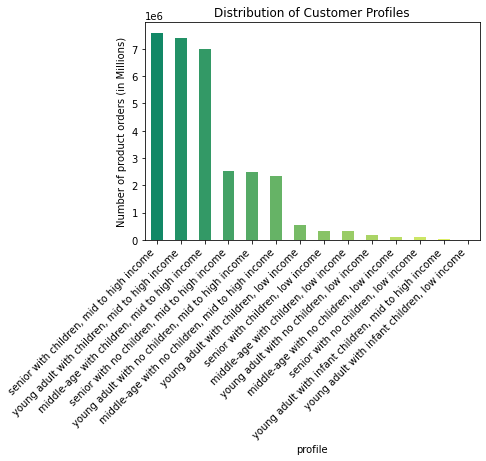

<Figure size 432x288 with 0 Axes>

In [26]:
# create bar chart of profiles
chart = df_opcreg['profile'].value_counts().plot.bar\
  (color = sns.color_palette('summer', 14), xlabel= 'profile',  ylabel= 'Number of product orders (in Millions)',
   title = 'Distribution of Customer Profiles')
plt.xticks(rotation= 45, horizontalalignment="right")
plt.figure()

### In all but one profile group, those with mid to high incomes have more product orders

In [27]:
# save bar chart
chart.figure.savefig(os.path.join(path, 'visualizations', 'bar_profiles.png'))

<a id="sec10"></a>
## 10. Aggregate the max, mean, min vars (Part 1, Step 7)

In [28]:
df_opcreg.dtypes

order_id                    int64
user_id                     int64
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                  float64
department_id             float64
prices                    float64
price_range                object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
avg_spend                 float64
spending_flag              object
avg_days_btw_orders       float64
order_frq_flag             object
first_name                 object
last_name                  object
gender                     object
state                      object
age                         int64
date_joined                object
num_dependents

<a id="sec10.1"></a>
### 10.1. Aggregate Prices by Profile

In [29]:
# aggregate prices by profile
prices_by_prof = df_opcreg.groupby('profile').agg({'prices': ['mean', 'min', 'max']})

In [30]:
prices_by_prof

prices           
                                                        mean  min   max
profile                                                                
middle-age with children, low income                6.502259  1.0  25.0
middle-age with children, mid to high income        7.849410  1.0  25.0
middle-age with no children, mid to high income     7.850865  1.0  25.0
middle-age with no chlidren, low income             6.474919  1.0  25.0
senior with children, low income                    6.520288  1.0  25.0
senior with children, mid to high income            7.850166  1.0  25.0
senior with no children, low income                 6.521983  1.0  25.0
senior with no children, mid to high income         7.855994  1.0  25.0
young adult with children, low income               6.493089  1.0  25.0
young adult with children, mid to high income       7.883300  1.0  25.0
young adult with infant children, low income        7.405458  1.1  15.0
young adult with infant children, mid to high i...  7.994785  1.0  15.0
young adult with no children, low income            6.499025  1.0  25.0
young adult with no children, mid to high income    7.876312  1.0  25.0

<a id="sec10.2"></a>
### 10.2. Aggregate Prices by Profile and Family Status

In [31]:
# aggregate prices by profile and family status
prices_by_prof_fs = df_opcreg.groupby(['profile', 'fam_status']).agg({'prices': ['mean', 'min', 'max']})

In [32]:
# have a look at the resulting table
prices_by_prof_fs

prices  \
                                                                                         mean   
profile                                            fam_status                                   
middle-age with children, low income               married                           6.502259   
middle-age with children, mid to high income       married                           7.849410   
middle-age with no children, mid to high income    single                            7.850865   
middle-age with no chlidren, low income            single                            6.474919   
senior with children, low income                   married                           6.520288   
senior with children, mid to high income           married                           7.850166   
senior with no children, low income                divorced/widowed                  6.521983   
senior with no children, mid to high income        divorced/widowed                  7.855994   
young adult with children, low income              living with parents and siblings  6.469949   
                                                   married                           6.498090   
young adult with children, mid to high income      living with parents and siblings  7.894767   
                                                   married                           7.880687   
young adult with infant children, low income       living with parents and siblings  8.183182   
                                                   married                           7.290162   
young adult with infant children, mid to high i... living with parents and siblings  8.134981   
                                                   married                           7.962727   
young adult with no children, low income           single                            6.499025   
young adult with no children, mid to high income   single                            7.876312   

                                                                                          \
                                                                                     min   
profile                                            fam_status                              
middle-age with children, low income               married                           1.0   
middle-age with children, mid to high income       married                           1.0   
middle-age with no children, mid to high income    single                            1.0   
middle-age with no chlidren, low income            single                            1.0   
senior with children, low income                   married                           1.0   
senior with children, mid to high income           married                           1.0   
senior with no children, low income                divorced/widowed                  1.0   
senior with no children, mid to high income        divorced/widowed                  1.0   
young adult with children, low income              living with parents and siblings  1.0   
                                                   married                           1.0   
young adult with children, mid to high income      living with parents and siblings  1.0   
                                                   married                           1.0   
young adult with infant children, low income       living with parents and siblings  1.2   
                                                   married                           1.1   
young adult with infant children, mid to high i... living with parents and siblings  1.1   
                                                   married                           1.0   
young adult with no children, low income           single                            1.0   
young adult with no children, mid to high income   single                            1.0   

                                                                                           
                        

<Figure size 432x288 with 0 Axes>

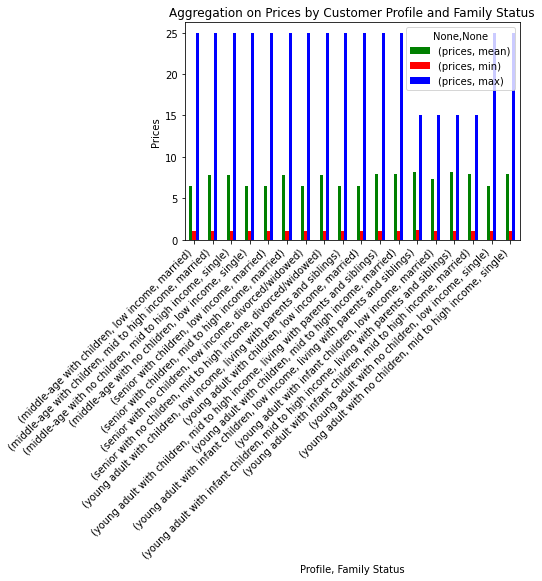

<Figure size 432x288 with 0 Axes>

In [33]:
# put the results into a bar chart
chart = prices_by_prof_fs.plot.bar(stacked=False,
                        title = 'Aggregation on Prices by Customer Profile and Family Status',
                        color = ['green','red', 'blue'], xlabel='Profile, Family Status', ylabel='Prices')
plt.xticks(rotation= 45, horizontalalignment="right")
plt.figure()

### Regardless of income level or family status, mean price is quite consistent, but those with infant children have a lower max price

In [34]:
# save bar chart
chart.figure.savefig(os.path.join(path, 'visualizations', 'bar_prices_by_prof_fs.png'))

<a id="sec10.3"></a>
### 10.3. Aggregate Prices by Profile and Region

In [35]:
# aggregate prices by profile and region
prices_by_prof_reg = df_opcreg.groupby(['profile', 'region']).agg({'prices': ['mean', 'min', 'max']})

In [36]:
# have a look at the resulting table
prices_by_prof_reg

prices       \
                                                                  mean  min   
profile                                            region                     
middle-age with children, low income               Midwest    6.464193  1.0   
                                                   Northeast  6.484860  1.0   
                                                   South      6.511343  1.0   
                                                   West       6.533770  1.0   
middle-age with children, mid to high income       Midwest    7.849639  1.0   
                                                   Northeast  7.830781  1.0   
                                                   South      7.860108  1.0   
                                                   West       7.848625  1.0   
middle-age with no children, mid to high income    Midwest    7.848170  1.0   
                                                   Northeast  7.841359  1.0   
                                                   South      7.865822  1.0   
                                                   West       7.840771  1.0   
middle-age with no chlidren, low income            Midwest    6.505699  1.0   
                                                   Northeast  6.552505  1.0   
                                                   South      6.414371  1.0   
                                                   West       6.478927  1.0   
senior with children, low income                   Midwest    6.501191  1.0   
                                                   Northeast  6.506948  1.0   
                                                   South      6.514899  1.0   
                                                   West       6.555361  1.0   
senior with children, mid to high income           Midwest    7.843408  1.0   
                                                   Northeast  7.853576  1.0   
                                                   South      7.853475  1.0   
                                                   West       7.849656  1.0   
senior with no children, low income                Midwest    6.549075  1.0   
                                                   Northeast  6.568197  1.0   
                                                   South      6.540264  1.0   
                                                   West       6.439775  1.0   
senior with no children, mid to high income        Midwest    7.838123  1.0   
                                                   Northeast  7.866241  1.0   
                                                   South      7.863624  1.0   
                                                   West       7.855150  1.0   
young adult with children, low income              Midwest    6.487144  1.0   
                                                   Northeast  6.501498  1.0   
                                                   South      6.520732  1.0   
                                                   West       6.454343  1.0   
young adult with children, mid to high income      Midwest    7.895212  1.0   
                                                   Northeast  7.864336  1.0   
                                                   South      7.884274  1.0   
                                                   West       7.884211  1.0   
young adult with infant children, low income       Midwest    6.882090  1.1   
                                                   Northeast  7.535075  1.2   
                                                   South      7.141779  1.1   
                                                   West       8.448734  1.2   
young adult with infant children, mid to high i... Midwest    8.048443  1.1   
                                                   Northeast  7.864915  1.0   
                                                   South      8.067198  1.1   
                                                   West       7.938861  1.1   
young adult with no children, low i

<Figure size 432x288 with 0 Axes>

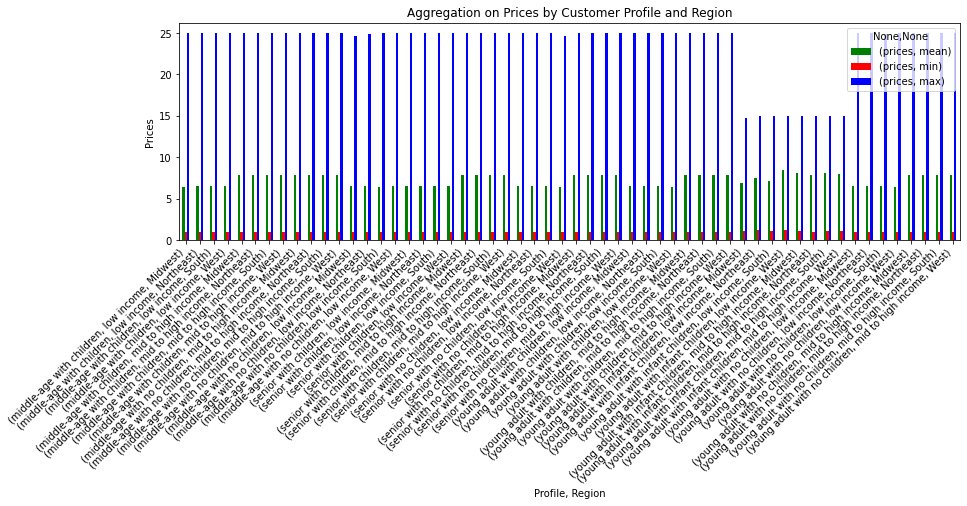

<Figure size 432x288 with 0 Axes>

In [37]:
# put the results into a bar chart
chart = prices_by_prof_reg.plot.bar(stacked=False,
                        title = 'Aggregation on Prices by Customer Profile and Region',
                        color = ['green','red', 'blue'], xlabel='Profile, Region', ylabel='Prices', figsize=(14,4))
plt.xticks(rotation= 45, horizontalalignment="right")
plt.figure()

### Regardless of income level and region, mean price is quite consistent, but those with infant children have a lower max price.

In [38]:
# save bar chart
chart.figure.savefig(os.path.join(path, 'visualizations', 'bar_prices_by_prof_reg.png'))

<a id="sec10.4"></a>
### 10.4. Aggregate Prices by Profile and Department

In [39]:
# aggregate prices by profile and department
prices_by_prof_dept = df_opcreg.groupby(['profile', 'department_id']).agg({'prices': ['mean', 'min', 'max']})

In [40]:
# have a look at the resulting table
prices_by_prof_dept

prices       \
                                                                    mean  min   
profile                                          department_id                  
middle-age with children, low income             1.0            6.959205  1.0   
                                                 2.0            5.647170  1.3   
                                                 3.0            6.993635  1.1   
                                                 4.0            6.966863  1.0   
                                                 5.0            6.670928  1.0   
...                                                                  ...  ...   
young adult with no children, mid to high income 17.0           7.403738  1.0   
                                                 18.0           7.656269  1.0   
                                                 19.0           4.282808  1.6   
                                                 20.0           7.879247  1.0   
                                                 21.0           8.820851  1.0   

                                                                      
                                                                 max  
profile                                          department_id        
middle-age with children, low income             1.0            15.0  
                                                 2.0            14.7  
                                                 3.0            15.0  
                                                 4.0            15.0  
                                                 5.0            15.0  
...                                                              ...  
young adult with no children, mid to high income 17.0           15.0  
                                                 18.0           15.0  
                                                 19.0            7.0  
                                                 20.0           15.0  
                                                 21.0           15.0  

[264 rows x 3 columns]

### With as many as 21 departments for each of 14 profiles, this grouping is bit unwieldy to work with en masse.  It may be better to produce separate output for each of the 14 profiles, but there are still other options that will be explored in another script created for this project.

<a id="sec11"></a>
## 11. More column mods to support additional visualizations that may be needed

In [41]:
# replace day number with day name;  this changes the type from int to string
df_opcreg.loc[ df_opcreg['orders_day_of_week'] == 0, 'orders_day_of_week'] = "Saturday"
df_opcreg.loc[ df_opcreg['orders_day_of_week'] == 1, 'orders_day_of_week'] = "Sunday"
df_opcreg.loc[ df_opcreg['orders_day_of_week'] == 2, 'orders_day_of_week'] = "Monday"
df_opcreg.loc[ df_opcreg['orders_day_of_week'] == 3, 'orders_day_of_week'] = "Tuesday"
df_opcreg.loc[ df_opcreg['orders_day_of_week'] == 4, 'orders_day_of_week'] = "Wednesday"
df_opcreg.loc[ df_opcreg['orders_day_of_week'] == 5, 'orders_day_of_week'] = "Thursday"
df_opcreg.loc[ df_opcreg['orders_day_of_week'] == 6, 'orders_day_of_week'] = "Friday"

In [42]:
# create department column
df_opcreg.loc[ df_opcreg['department_id'] == 1, 'department'] = "frozen"
df_opcreg.loc[ df_opcreg['department_id'] == 2, 'department'] = "other"
df_opcreg.loc[ df_opcreg['department_id'] == 3, 'department'] = "bakery"
df_opcreg.loc[ df_opcreg['department_id'] == 4, 'department'] = "produce"
df_opcreg.loc[ df_opcreg['department_id'] == 5, 'department'] = "alcohol"
df_opcreg.loc[ df_opcreg['department_id'] == 6, 'department'] = "international"
df_opcreg.loc[ df_opcreg['department_id'] == 7, 'department'] = "beverages"
df_opcreg.loc[ df_opcreg['department_id'] == 8, 'department'] = "pets"
df_opcreg.loc[ df_opcreg['department_id'] == 9, 'department'] = "dry goods pasta"
df_opcreg.loc[ df_opcreg['department_id'] == 10, 'department'] = "bulk"
df_opcreg.loc[ df_opcreg['department_id'] == 11, 'department'] = "personal care"
df_opcreg.loc[ df_opcreg['department_id'] == 12, 'department'] = "meat seafood"
df_opcreg.loc[ df_opcreg['department_id'] == 13, 'department'] = "pantry"
df_opcreg.loc[ df_opcreg['department_id'] == 14, 'department'] = "breakfast"
df_opcreg.loc[ df_opcreg['department_id'] == 15, 'department'] = "canned goods"
df_opcreg.loc[ df_opcreg['department_id'] == 16, 'department'] = "dairy eggs"
df_opcreg.loc[ df_opcreg['department_id'] == 17, 'department'] = "household"
df_opcreg.loc[ df_opcreg['department_id'] == 18, 'department'] = "babies"
df_opcreg.loc[ df_opcreg['department_id'] == 19, 'department'] = "snacks"
df_opcreg.loc[ df_opcreg['department_id'] == 20, 'department'] = "deli"
df_opcreg.loc[ df_opcreg['department_id'] == 21, 'department'] = "missing"


In [43]:
# create income_flag column
df_opcreg.loc[ df_opcreg['income'] <= 40000, 'income_flag'] = "low"
df_opcreg.loc[ df_opcreg['income'] > 40000, 'income_flag'] = "high"

In [44]:
# create income_flag column
df_opcreg.loc[ df_opcreg['age'] < 40, 'age_flag'] = "young"
df_opcreg.loc[ (df_opcreg['age'] >= 40) & (df_opcreg['age'] < 60), 'age_flag'] = "middle"
df_opcreg.loc[ df_opcreg['age'] >= 60, 'age_flag'] = "senior"

<a id="sec12"></a>
## 12. Export final data set (Part 1, Step 10)

In [45]:
# export final data set
df_opcreg.to_pickle(os.path.join(path, 'data','prepped', 'final_data_set_ex10.pkl'))